In [1]:
import scipy.io
import librosa
from librosa import display
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cmath
import seaborn as sns
import scipy
import IPython.display as ipd
import math
from numpy.linalg import inv
from collections import Iterable 
from ipykernel import kernelapp as app
from tqdm import tqdm
from scipy.io import wavfile
import scipy.io
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import inv

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from ipykernel import kernelapp as app


In [2]:
training = scipy.io.loadmat('trX.mat')
labels=  scipy.io.loadmat('trY.mat')

In [3]:
training1=training['trX'] 
y_train=labels['trY']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


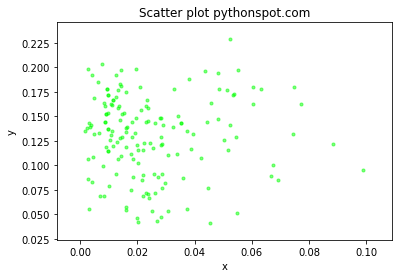

In [4]:
x=training1[0,:]
y=training1[1,:]
colors = (0,1,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Initialising the parameters

In [5]:
data_points_withones=np.vstack([training1, [1]*160])
initial_sample_weights=[1/160]*160
initial_sample_weights1=np.reshape(initial_sample_weights,(1,160))
y_train_final=y_train.flatten()
phi=[]
full_cost_list=[]
beta_list=[]
weights=[]

In [6]:
def cost(a_ini,data_points_withones,y_train,initial_sample_weights1):
    pb_3=np.matmul(a_ini,data_points_withones)
    pb_3_step1=np.tanh(pb_3)
    y_new=np.reshape(y_train,(1,160))
    cost=np.sum(np.multiply(initial_sample_weights1,(pb_3_step1-y_new)**2))
    return(cost)
    

In [7]:
for m in tqdm(range(1500)):
    w_ni=np.random.normal(0.01,0.03,3)*0.0001
    a_ini=np.reshape(w_ni,(1,3))
    rho=0.0001
    cost_initial=cost(a_ini,data_points_withones,y_train,initial_sample_weights1)
    costlist=[]
    for iter in range(10000):
        pb_3=np.matmul(a_ini,data_points_withones)
        pb_3_step1=np.tanh(pb_3)
        y_new=np.reshape(y_train,(1,160))
        err_step1= 2*np.multiply(initial_sample_weights1,(pb_3_step1-y_new))
        err=err_step1*(np.multiply((1+pb_3_step1),(1-pb_3_step1)))
        a_ini=a_ini-np.multiply(rho,np.matmul(err,data_points_withones.T))
        cost_final=cost(a_ini,data_points_withones,y_train,initial_sample_weights1)
        
        costlist.append(cost_initial)
        cost_initial=cost_final
  
    full_cost_list.append(costlist)
    final_pb3=pb_3_step1.flatten()
    y_test=[0]*160
    for i in range(len(final_pb3)):
        if final_pb3[i]>0:
            y_test[i]= 1
        else:
            y_test[i]= -1
    a=0
    b=0
    for j in range(len(final_pb3)):
        if y_test[j]==y_train_final[j]:
            a=a+initial_sample_weights1[0][j]
        else:
            b=b+initial_sample_weights1[0][j]

    beta=0.5*np.log(a/b)
    beta_list.append(beta)
    phi.append(y_test)

    w_new=[0]*160
    for k in range(len(final_pb3)):
        if y_test[k]==y_train_final[k]:
            w_new[k]=initial_sample_weights1[0][k]*np.exp(-beta)
        else:
            w_new[k]=initial_sample_weights1[0][k]*np.exp(beta)
    weights.append(initial_sample_weights1)
    w_new1=np.array(w_new)/np.sum(np.array(w_new))
    initial_sample_weights1=np.reshape(w_new1,(1,160))

100%|██████████| 1500/1500 [12:05<00:00,  2.07it/s]


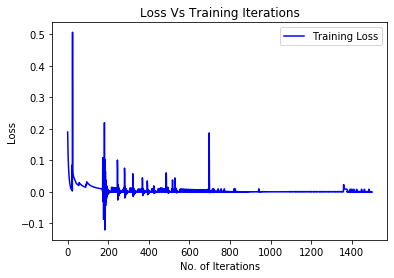

In [8]:
fig = plt.figure()
plt.plot( beta_list, c='Blue', label='Training Loss')
plt.xlabel('No. of Iterations')
plt.ylabel('Loss')
plt.title('Loss Vs Training Iterations')
plt.legend()
plt.show()

In [9]:
a=1e+9

In [10]:
print(a)

1000000000.0


In [11]:
print(iter)

9999


In [12]:
gh=np.reshape(beta_list,(1500,1))

In [13]:
ghf=np.multiply(gh,phi)

In [14]:
fd=ghf.sum(axis=0)

In [15]:
for i in range(len(fd)):
    if fd[i]>0:
        fd[i]=1
    else:
        fd[i]=-1

In [16]:
df=0
for k in range(len(fd)):
    if fd[k]==y_train_final[k]:
        df=df+1

In [17]:
print(df/160)

0.78125


In [18]:
print(beta_list)

[0.18974481085245146, 0.14927715689720775, 0.1203087579995549, 0.09847029286022223, 0.08142600042243292, 0.0678025318255947, 0.056730684255833816, 0.0476265344596977, 0.040078022283099694, 0.0337823192605714, 0.028509390246457218, 0.02407981533848105, 0.020350725818249545, 0.01720653386403414, 0.014552591835767771, 0.012310700255630377, 0.010415820012755308, 0.00881359449846526, 0.007458434278939226, 0.00631200500779357, 0.005342013164882721, 0.08448507042736537, 0.07118930407845447, 0.0024938371594183458, 0.5066830194321529, 0.0709463437248244, 0.05729795932423916, 0.054189780553503146, 0.05140174411784763, 0.048886773176951254, 0.04660659611984415, 0.04452977858126865, 0.04263026099327207, 0.04088625630724344, 0.03927940843015954, 0.0377941421286043, 0.03641715541399277, 0.03513701924647251, 0.03394385897823675, 0.032829098697635076, 0.030155928917633544, 0.029272917128562018, 0.02690378286399581, 0.026198771194271154, 0.02552977337028295, 0.024894098040330808, 0.02428931555623679, 0